In [1]:
import pandas as pd
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/siva/anaconda3/envs/ml/lib/pytho

In [3]:
import data_preprocessing
from data_preprocessing import*

trainPath='/home/siva/Desktop/ml/liar_dataset/train.tsv'
testPath='/home/siva/Desktop/ml/liar_dataset/test.tsv'
validationPath='/home/siva/Desktop/ml/liar_dataset/valid.tsv'

train,y,testX,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Logistic Regression from scratch
from random import seed
from random import randrange
from csv import reader
from math import exp

# Calculate accuracy percentage
def calc_accuracy(actual_label, predicted_label):
    correct_label = 0
    for i in range(len(actual_label)):
        if actual_label[i] == predicted_label[i]:
            correct_label += 1
    return correct_label / float(len(actual_label)) * 100.0

# Make a prediction with coefficients
def predict_coeff(row, coeff):
    yhat = coeff[0]
    for i in range(1,len(row)-1):
        yhat += coeff[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def calc_coeff_sgd(train, l_rate, n_epoch):
    coeff = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict_coeff(row, coeff)
            error = row[0] - yhat
            coeff[0] = coeff[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coeff[i + 1] = coeff[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coeff

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predicted_values = list()
    coeff = calc_coeff_sgd(train,l_rate,n_epoch)
    for row in test:
        yhat = predict_coeff(row,coeff)
        yhat = round(yhat)
        predicted_values.append(yhat)
    return(predicted_values)

import copy
# Evaluate logistic regression algorithm
def evaluate_algorithm(dataset,testset, n_folds,l_rate, *args):
    results = list()
    predicted = logistic_regression(list(dataset), list(testset),l_rate,*args)
    actual = [row[0] for row in testset]
    #print("Actual:",actual,"Predicted:",predicted)
    accuracy = calc_accuracy(actual, predicted)
    #print("Accuracy",accuracy)
    results.append(accuracy)
    return results,actual,predicted

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Test the logistic regression algorithm on the liar dataset
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
model = TfidfVectorizer(ngram_range=(1,2), max_features=200,binary=True)
review_model=model.fit_transform(train)
test_model = model.fit_transform(testX)
seed(1)
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 100
review_model=review_model.toarray()
test_model = test_model.toarray()
review_m=[]
test_m=[]
for i in range(len(review_model)):
     review_m.append(list(review_model[i]))
for i in range(len(test_model)):
     test_m.append(list(test_model[i]))
review_model=np.insert(review_m,0,y,axis=1)
test_model = np.insert(test_m,0,testY,axis=1)
scores,actual,predicted = evaluate_algorithm(review_model,test_model, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Scores: [79.24970691676437]
Mean Accuracy: 79.250%


In [6]:
# Classification report 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification_ans = classification_report(actual, predicted)
print(classification_ans)

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88       680
         1.0       0.00      0.00      0.00       173

    accuracy                           0.79       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.63      0.79      0.70       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


======Confusion Matrix======

 [[676   4]
 [173   0]]


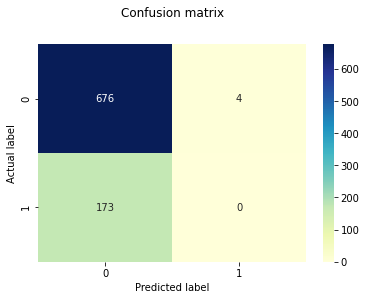

In [7]:
# Confusion matrix for liar dataset
# Print confusion matrix to depict true positive, false positive, true negative and false negatives

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


#Confusion matrix
print("======Confusion Matrix======")
matrix = confusion_matrix(actual,predicted)
print('\n',matrix)

pd.crosstab(np.array(actual), np.array(predicted), rownames=['Actual'], colnames=['Predicted'], margins=True)

p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663, 79.71864009378663]


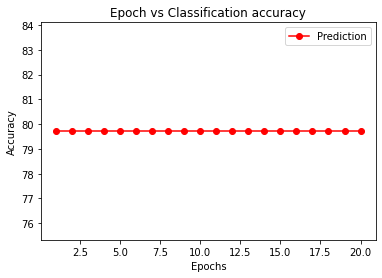

In [9]:
accuracy_list = list()
epochs = range(1,21)
for j in epochs:
    scores,actual,predicted = evaluate_algorithm(review_model,test_model, n_folds, l_rate, j)
    accuracy = sum(scores)/float(len(scores))
    accuracy_list.append(accuracy)
print(accuracy_list)

plt.plot(epochs, accuracy_list, 'r', label='Prediction',marker='o')
plt.title('Epoch vs Classification accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()